Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../data/v7/Handballprojekt_2Liga_14.01.2023.xlsx")

file.sheet_names

df = file.parse('2. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]


Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','throwSuccess','whistleThrowTime',
              'LRHandy','throwDirection','goalKeeperPosition',
              'goalKeeperName', 'goalKeeperHeightCM','shooterheightCM',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16','goalKeeperName':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,throwSuccess,whistleThrowTime,LRHandy,throwDirection,goalKeeperPosition,goalKeeperName,goalKeeperHeightCM,shooterheightCM,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,EHV Aue,TUSEM Essen,1.0,Noah Beyer,10.0,5.0,3.0,1.0,NaN,1.0,3.0,NaN,Bochmann,192.0,180.0,0.0,1.0,NaN,NaN
1,EHV Aue,TUSEM Essen,1.0,Noah Beyer,15.0,8.0,4.0,1.0,NaN,1.0,9.0,NaN,Bochmann,192.0,180.0,0.0,2.0,3.0,1.0
2,EHV Aue,TUSEM Essen,1.0,Noah Beyer,34.0,15.0,14.0,0.0,NaN,1.0,2.0,NaN,Petursson,185.0,180.0,0.0,3.0,9.0,1.0
3,EHV Aue,TUSEM Essen,1.0,Noah Beyer,39.0,18.0,17.0,1.0,NaN,1.0,8.0,NaN,Petursson,185.0,180.0,2.0,4.0,2.0,2.0
4,EHV Aue,TUSEM Essen,1.0,Noah Beyer,43.0,19.0,19.0,1.0,NaN,1.0,7.0,NaN,Petursson,185.0,180.0,0.0,5.0,8.0,1.0


In [4]:
df = df.loc[:,('name','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)

df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Dirk Holzner,10,3,6,0,1,4,6,4,14,48
Fynn Hangstein,6,5,3,2,0,1,21,6,33,77
Noah Beyer,8,3,15,5,0,5,13,19,26,94
Total,24,11,24,7,1,10,40,29,73,219


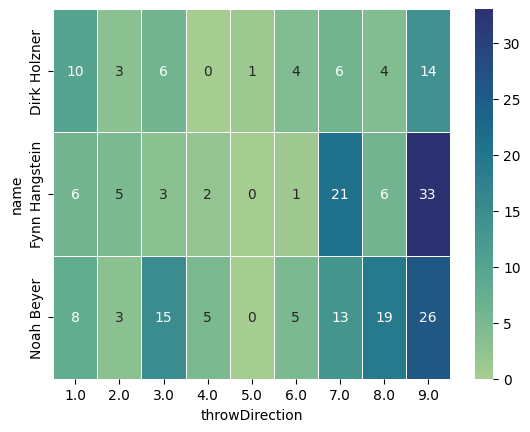

In [5]:
ax = sns.heatmap(pd.crosstab(df['name'], df['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

In [6]:
df2 =pd.crosstab(df['name'], df['throwSuccess']) 
df2

throwSuccess,0.0,1.0
name,,
Dirk Holzner,6,42
Fynn Hangstein,13,64
Noah Beyer,15,79


In [7]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess                   0.0  1.0
name           throwDirection          
Dirk Holzner   1.0               2    8
               2.0               1    2
               3.0               0    6
               5.0               0    1
               6.0               1    3
               7.0               1    5
               8.0               0    4
               9.0               1   13
Fynn Hangstein 1.0               0    6
               2.0               2    3
               3.0               0    3
               4.0               0    2
               6.0               0    1
               7.0               4   17
               8.0               0    6
               9.0               7   26
Noah Beyer     1.0               0    8
               2.0               1    2
               3.0               3   12
               4.0               1    4
               6.0               1    4
               7.0               1   12
               8.0               3   16
               9.0               5   21

In [8]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess                   0.0  1.0
name           throwDirection          
Dirk Holzner   1.0               2    8
               2.0               1    2
               3.0               0    6
               5.0               0    1
               6.0               1    3
               7.0               1    5
               8.0               0    4
               9.0               1   13
Fynn Hangstein 1.0               0    6
               2.0               2    3
               3.0               0    3
               4.0               0    2
               6.0               0    1
               7.0               4   17
               8.0               0    6
               9.0               7   26
Noah Beyer     1.0               0    8
               2.0               1    2
               3.0               3   12
               4.0               1    4
               6.0               1    4
               7.0               1   12
               8.0               3   16
               9.0               5   21

Playerwise Successfull Throw

In [9]:
dfs = df.loc[df['throwSuccess'] == 1]
dfs
dfscs =pd.crosstab(dfs['name'], dfs['throwDirection'], margins=True, margins_name="Total") 
dfscs

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Dirk Holzner,8,2,6,0,1,3,5,4,13,42
Fynn Hangstein,6,3,3,2,0,1,17,6,26,64
Noah Beyer,8,2,12,4,0,4,12,16,21,79
Total,22,7,21,6,1,8,34,26,60,185


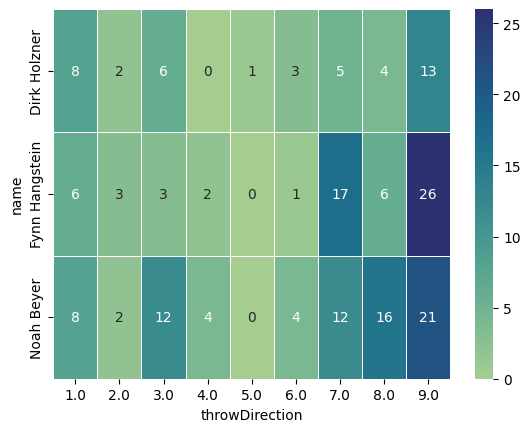

In [10]:
axs = sns.heatmap(pd.crosstab(dfs['name'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Playerwise Failed Throws

In [11]:
dff = df.loc[df['throwSuccess'] == 0]
dff
dffcs =pd.crosstab(dff['name'], dff['throwDirection'], margins=True, margins_name="Total") 
dffcs

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
Dirk Holzner,2,1,0,0,1,1,0,1,6
Fynn Hangstein,0,2,0,0,0,4,0,7,13
Noah Beyer,0,1,3,1,1,1,3,5,15
Total,2,4,3,1,2,6,3,13,34


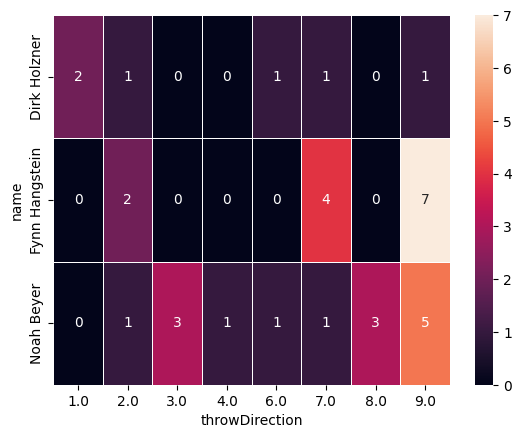

In [12]:
axf = sns.heatmap(pd.crosstab(dff['name'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

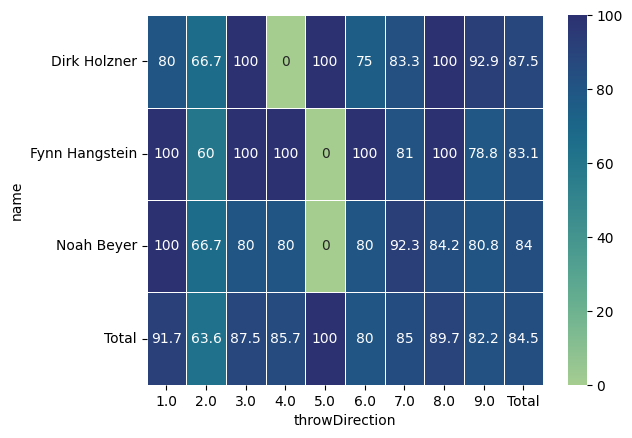

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Dirk Holzner,80.000000,66.666667,100.0,0.000000,100.0,75.0,83.333333,100.000000,92.857143,87.500000
Fynn Hangstein,100.000000,60.000000,100.0,100.000000,0.0,100.0,80.952381,100.000000,78.787879,83.116883
Noah Beyer,100.000000,66.666667,80.0,80.000000,0.0,80.0,92.307692,84.210526,80.769231,84.042553
Total,91.666667,63.636364,87.5,85.714286,100.0,80.0,85.000000,89.655172,82.191781,84.474886


In [13]:
relSuccess = dfscs/df1*100
relSuccess.apply(np.floor)
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess